In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/german-credit-data-set-with-credit-risk/reintegrate_credit_score.py
/kaggle/input/german-credit-data-set-with-credit-risk/german_credit_data_updated.csv
/kaggle/input/german-credit/german_credit_data.csv


In [2]:
import kagglehub
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

import kagglehub

# Download latest version
path = kagglehub.dataset_download("benjaminmcgregor/german-credit-data-set-with-credit-risk")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/german-credit-data-set-with-credit-risk


In [3]:
df = pd.read_csv('/kaggle/input/german-credit-data-set-with-credit-risk/german_credit_data_updated.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,2


In [4]:
from sklearn.linear_model import LogisticRegression
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        954 non-null    int64 
 1   Age               954 non-null    int64 
 2   Sex               954 non-null    object
 3   Job               954 non-null    int64 
 4   Housing           954 non-null    object
 5   Saving accounts   779 non-null    object
 6   Checking account  576 non-null    object
 7   Credit amount     954 non-null    int64 
 8   Duration          954 non-null    int64 
 9   Purpose           954 non-null    object
 10  Credit Risk       954 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 82.1+ KB


In [5]:
# missing values occur in the savings and checkings accounts, is this random?
na = df.isna()
na

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
949,False,False,False,False,False,False,True,False,False,False,False
950,False,False,False,False,False,False,False,False,False,False,False
951,False,False,False,False,False,False,False,False,False,False,False
952,False,False,False,False,False,False,False,False,False,False,False


In [6]:
saving_na=df[na["Saving accounts"]== True]
saving_na

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
5,5,35,male,1,free,NaN,NaN,9055,36,education,1
16,16,53,male,2,own,NaN,NaN,2424,24,radio/TV,1
17,17,25,male,2,own,NaN,little,8072,30,business,1
24,24,26,male,2,own,NaN,NaN,2069,10,furniture/equipment,1
...,...,...,...,...,...,...,...,...,...,...,...
928,928,58,male,2,own,NaN,NaN,1867,30,radio/TV,1
939,939,46,male,3,own,NaN,NaN,6842,24,car,1
940,940,45,male,3,own,NaN,NaN,3527,12,car,1
942,942,31,male,2,own,NaN,NaN,929,24,furniture/equipment,1


In [7]:
check_na=df[na["Checking account"] == True]
check_na

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
2,2,49,male,1,own,little,NaN,2096,12,education,1
5,5,35,male,1,free,NaN,NaN,9055,36,education,1
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,1
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,1
16,16,53,male,2,own,NaN,NaN,2424,24,radio/TV,1
...,...,...,...,...,...,...,...,...,...,...,...
943,943,42,male,1,own,little,NaN,1455,4,car,1
947,947,38,male,3,own,NaN,NaN,2859,12,car,1
948,948,43,male,1,own,little,NaN,1533,18,furniture/equipment,2
949,949,31,male,2,own,moderate,NaN,3621,24,radio/TV,2


In [8]:
# 1 means a good credit score, 2 means a bad credit score
#Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
check_na['Credit Risk'].value_counts()

Credit Risk
1    335
2     43
Name: count, dtype: int64

In [9]:
saving_na["Credit Risk"].value_counts()

Credit Risk
1    143
2     32
Name: count, dtype: int64

In [10]:
pip install miceforest

Note: you may need to restart the kernel to use updated packages.


In [11]:
for col in df.select_dtypes(['object']).columns:
    df[col] = df[col].astype('category')


In [12]:
df = df.drop('Unnamed: 0',axis=1)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2
...,...,...,...,...,...,...,...,...,...,...
949,31,male,2,own,moderate,NaN,3621,24,radio/TV,2
950,40,male,0,own,little,moderate,3590,18,business,1
951,24,male,2,own,little,little,2145,36,business,2
952,28,female,2,rent,quite rich,moderate,4113,24,car,2


In [13]:
# the missing values skew towards good credit, we'll use multiple imputation to fill the values to account for imputation uncertainty

import miceforest as mf
kernel = mf.imputation_kernel.ImputationKernel(
    data=df,
    random_state=42,
)
kernel.mice(iterations=3)
imputed_datasets = kernel.complete_data()
imputed_datasets


/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,67,male,2,own,quite rich,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,little,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2
...,...,...,...,...,...,...,...,...,...,...
949,31,male,2,own,moderate,moderate,3621,24,radio/TV,2
950,40,male,0,own,little,moderate,3590,18,business,1
951,24,male,2,own,little,little,2145,36,business,2
952,28,female,2,rent,quite rich,moderate,4113,24,car,2


In [15]:
# need to make dummy variables for the housing, saving accounts, checking account, sex and purpose columns using one-hot encoding 
ready = pd.get_dummies(imputed_datasets, columns=['Sex','Housing','Saving accounts','Checking account','Purpose'],
               prefix={'Sex':'sex','Housing':'status','Saving accounts':'amount','Checking account':'size','Purpose':'type'},dtype=int)
ready

,Age,Job,Credit amount,Duration,Credit Risk,sex_female,sex_male,status_free,status_own,status_rent,...,size_moderate,size_rich,type_business,type_car,type_domestic appliances,type_education,type_furniture/equipment,type_radio/TV,type_repairs,type_vacation/others
0,67,2,1169,6,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,2,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,2,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,31,2,3621,24,2,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
950,40,0,3590,18,1,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,0
951,24,2,2145,36,2,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
952,28,2,4113,24,2,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


In [16]:
# create our training and validation sets with train_test_split
from sklearn.model_selection import train_test_split
train_df,vaid_df = train_test_split(ready,test_size = 0.2,random_state=42)
train_df

,Age,Job,Credit amount,Duration,Credit Risk,sex_female,sex_male,status_free,status_own,status_rent,...,size_moderate,size_rich,type_business,type_car,type_domestic appliances,type_education,type_furniture/equipment,type_radio/TV,type_repairs,type_vacation/others
292,44,3,6419,24,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
891,46,2,1829,15,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
736,23,3,11560,24,2,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
109,35,2,1410,14,1,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,0
77,51,2,4771,11,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,39,3,6458,18,2,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
270,32,2,2662,18,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
860,27,2,5804,24,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
435,25,2,1484,12,2,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [18]:
train_x = train_df.drop('Credit Risk',axis=1)
train_x

,Age,Job,Credit amount,Duration,sex_female,sex_male,status_free,status_own,status_rent,amount_little,...,size_moderate,size_rich,type_business,type_car,type_domestic appliances,type_education,type_furniture/equipment,type_radio/TV,type_repairs,type_vacation/others
292,44,3,6419,24,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
891,46,2,1829,15,0,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
736,23,3,11560,24,1,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
109,35,2,1410,14,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
77,51,2,4771,11,0,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,39,3,6458,18,0,1,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
270,32,2,2662,18,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
860,27,2,5804,24,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
435,25,2,1484,12,0,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0


In [19]:
# specify our target value of the training set for our model to use
train_y = train_df['Credit Risk']
train_y

292    1
891    1
736    2
109    1
77     1
      ..
106    2
270    1
860    1
435    2
102    1
Name: Credit Risk, Length: 763, dtype: int64

In [21]:
# same process for validation set
valid_x= vaid_df.drop('Credit Risk',axis=1)
valid_x

,Age,Job,Credit amount,Duration,sex_female,sex_male,status_free,status_own,status_rent,amount_little,...,size_moderate,size_rich,type_business,type_car,type_domestic appliances,type_education,type_furniture/equipment,type_radio/TV,type_repairs,type_vacation/others
199,40,3,4297,18,0,1,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
422,47,1,958,12,0,1,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
695,50,2,1236,6,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
751,23,1,976,18,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
388,27,2,2326,15,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,57,1,1264,12,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
31,27,2,4020,24,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
712,46,3,2476,21,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0
321,32,2,1938,24,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [22]:
valid_y = vaid_df['Credit Risk']
valid_y

199    2
422    1
695    1
751    2
388    1
      ..
33     1
31     1
712    1
321    2
462    1
Name: Credit Risk, Length: 191, dtype: int64

In [26]:
# create our logistic regression model
log_model = LogisticRegression(class_weight="balanced",max_iter=10000)
log_model.fit(train_x,train_y)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [29]:
# make predictions with validation set to test performance 
from sklearn.metrics import roc_auc_score
roc_auc_score(valid_y, log_model.predict_proba(valid_x)[:,1])

np.float64(0.7048611111111112)

This number reflects a decent level of performance. A score of 1 represents a perfect model while a score of .5 means the model is no better than randomly guessing

In [30]:
# make random forest model
forest_model=RandomForestClassifier(n_estimators=1000)
forest_model.fit(train_x,train_y)

RandomForestClassifier(n_estimators=1000)

In [32]:
roc_auc_score(valid_y, forest_model.predict_proba(valid_x)[:,1])

np.float64(0.7219742063492064)

The forest model has a higher roc_auc score which represents better performance than the logistical regression model 

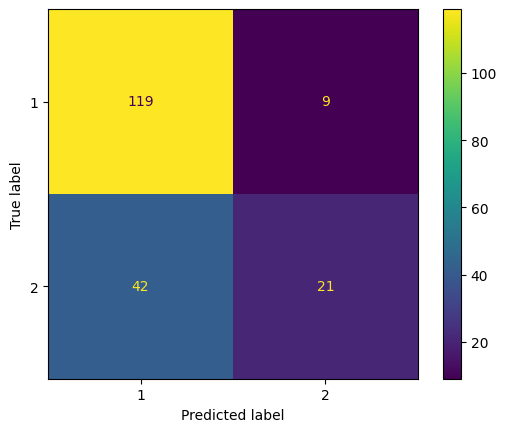

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
forest_preds = forest_model.predict(valid_x)
forest_confusion = ConfusionMatrixDisplay.from_predictions(valid_y,forest_preds)
forest_confusion

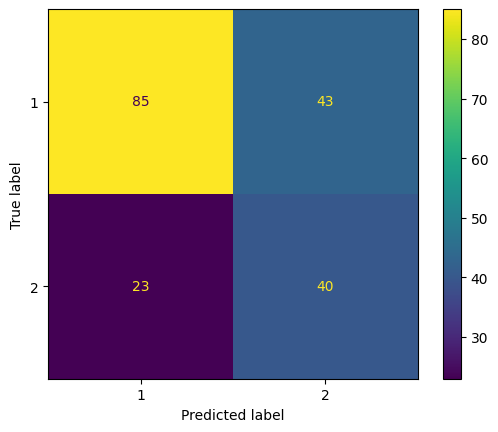

In [40]:
log_preds = log_model.predict(valid_x)
log_confusion = ConfusionMatrixDisplay.from_predictions(valid_y,log_preds)
log_confusion